# 非参数回归方法

考虑如下的非参数回归模型
$$Y=g(X)+\epsilon$$
其中$Y$为响应变量, $g(.)$为未知的一元光滑回归函数, $X$为一元的协变量, $\epsilon$为模型误差, 满足$E(\epsilon)=0$和$Var(\epsilon)=\sigma^2$.

非参数方法能够有效解决参数方法模型错误指定的问题, 它不需要假设回归函数$g(.)$的具体形式, 可在更大的范围内选择更适合$g(.)$形状的估计, 所得回归函数估计$\hat{g}(.)$的形式完全由数据来决定.   非参数方法可以看成是一种数据驱动的方法, 能够更好地拟合数据.

常用的非参数估计方法有: 近邻(-nearest neighbor, KNN)回归方法、多项式回归方法、回归样条方法、自然样条方法、光滑样条方法、Nadaraya-Watson核估计方法、局部线性光滑估计方法、回归树方法和支持向量回归方法等.

假设$D=\{(x_i,y_i),i=1,2,\cdots,n\}$是来自上面非参数回归模型的一组独立同分布的随机样本, 其中$x_i$为协变量的观测数据, $y_i$为响应变量的观测数据.

###### 1、KNN回归方法

K近邻法不仅可以用于分类问题, 也可用于回归问题, 并且KNN回归不需要对回归函数假定任何形式, 可通过数据对回归函数进行拟合, 是一种非参数估计方法。

给定一个正整数$K$和一个点$x$, 计算每个样本点的协变量$x_i$到点$x$的距离. 根据所计算距离的大小, 在数据集$D$中找出与$x$最邻近的$K$个样本点, 把包含这个样本点的集合记为$N_k(x)$, 然后用$N_k(x)$中$K$个数据中响应变量的平均值来估计回归函数, 即
$$\hat{g}(x)=\frac{1}{K}\sum\limits_{x_i\in N_K(x)} y_i$$
值得注意的是, $K$值的大小对拟合曲线至关重要. 如果$K=n$, 其实就是拟合一个常数模型, 即非参数函数的估计为常数:$\hat{g}(x)=\bar{y}$ , 这时拟合模型的自由度为1, 模型复杂度非常低, 尽管方差小, 但是偏差却很大, 容易欠拟合. 如果$K=1$, 将在每一个训练数据点上作插值, 这时拟合模型的自由度为$n$, 模型复杂度非常高, 尽管偏差小, 但是方差却很大, 将导致过拟合. 因此, 取小的$K$值，KNN回归提供了最灵活的拟合, 将导致偏差变小而方差变大; 取大的$K$值，KNN 回归提供了更平滑的拟合, 将导致方差变小而偏差变大。

在理论上, 可以通过平衡偏差和方差获得最优的$K$值. 在应用上, 可以通过数据驱动的交叉验证(cross validation, CV)方法选取最优的$K$值, 如LOOCV方法、GCV方法和折CV方法等.

在R语言中, 可用程序包kknn中的函数kknn(), 程序包FNN中的函数knn.reg()和程序包caret中的函数knnreg()进行KNN 回归分析.

程序包faraway中的exa数据集包含256个样本, 是来自于模型:$$Y=sin^3(2\pi X^3)+\epsilon$$  首先, 取$K=1,5,15,45$, 利用程序包kknn中的函数kknn()进行KNN回归, 绘制散点图, 真实曲线和KNN拟合曲线.

The following objects are masked from exa (pos = 3):

    m, x, y


The following objects are masked from exa (pos = 4):

    m, x, y


The following objects are masked from exa (pos = 9):

    m, x, y




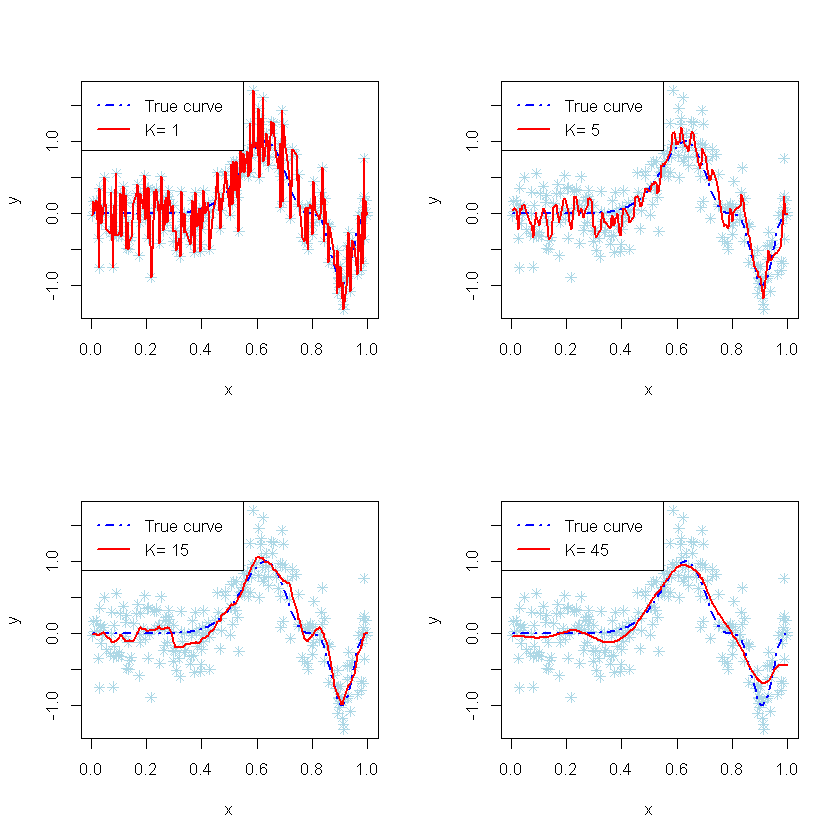

In [31]:
library(kknn)
data(exa, package = "faraway"); attach(exa)
par(mfrow = c(2, 2))
for (i in c(1, 5, 15, 45)) {
  fit.knn = kknn(y~x, train = exa, test = exa, k = i, kernel = "optimal")
  plot(y ~ x,  data = exa, pch = 8, col = "lightblue")
  lines(m ~ x, data = exa, lwd = 2, col = "blue", lty = 4)
  lines(x, fit.knn$fitted.values, lwd = 2, col = "red")
  legend("topleft", legend=c("True curve", paste("K=", i)),
          col = c("blue", "red"), lty = c(4, 1), lwd = 2)
}

In [29]:
print(exa)

         x       y       m
1   0.0048 -0.0339  0.0000
2   0.0086  0.1654  0.0000
3   0.0117  0.0245  0.0000
4   0.0170  0.1784  0.0000
5   0.0261 -0.3466  0.0000
6   0.0299 -0.7550  0.0000
7   0.0307  0.3549  0.0000
8   0.0315  0.0401  0.0000
9   0.0331  0.1059  0.0000
10  0.0340  0.1218  0.0000
11  0.0351 -0.1353  0.0000
12  0.0422 -0.0320  0.0000
13  0.0434  0.0862  0.0000
14  0.0477  0.5027  0.0000
15  0.0566 -0.2258  0.0000
16  0.0689 -0.2826  0.0000
17  0.0738  0.2985  0.0000
18  0.0744 -0.0033  0.0000
19  0.0784 -0.7472  0.0000
20  0.0796 -0.3249  0.0000
21  0.0824 -0.1750  0.0000
22  0.0828  0.1133  0.0000
23  0.0909  0.5567  0.0000
24  0.0919 -0.3106  0.0000
25  0.0987 -0.3093  0.0000
26  0.1007 -0.2672  0.0000
27  0.1041  0.2725  0.0000
28  0.1080 -0.3175  0.0000
29  0.1156  0.3786  0.0000
30  0.1223 -0.0461  0.0000
31  0.1245  0.1539  0.0000
32  0.1277  0.2481  0.0000
33  0.1285 -0.4856  0.0000
34  0.1328 -0.1231  0.0000
35  0.1359 -0.4943  0.0000
36  0.1398 -0.3818  0.0000
3

明显， $K=1$的KNN回归拟合曲线非常不光滑, 呈锯齿状, 存在严重的过拟合; $K=45$的KNN回归拟合曲线尽管变得更加光滑, 但是偏离了真实曲线, 存在较为严重的欠拟合; $K=15$的KNN回归拟合曲线变得较为光滑, 有较好的拟合效果。

其次, 利用LOOCV方法选择最优的值, 并用最优的值进行KNN回归拟合和计算均方误差(MSE).

$kernel
[1] "rectangular"

$k
[1] 21

[1] 0.0001131675

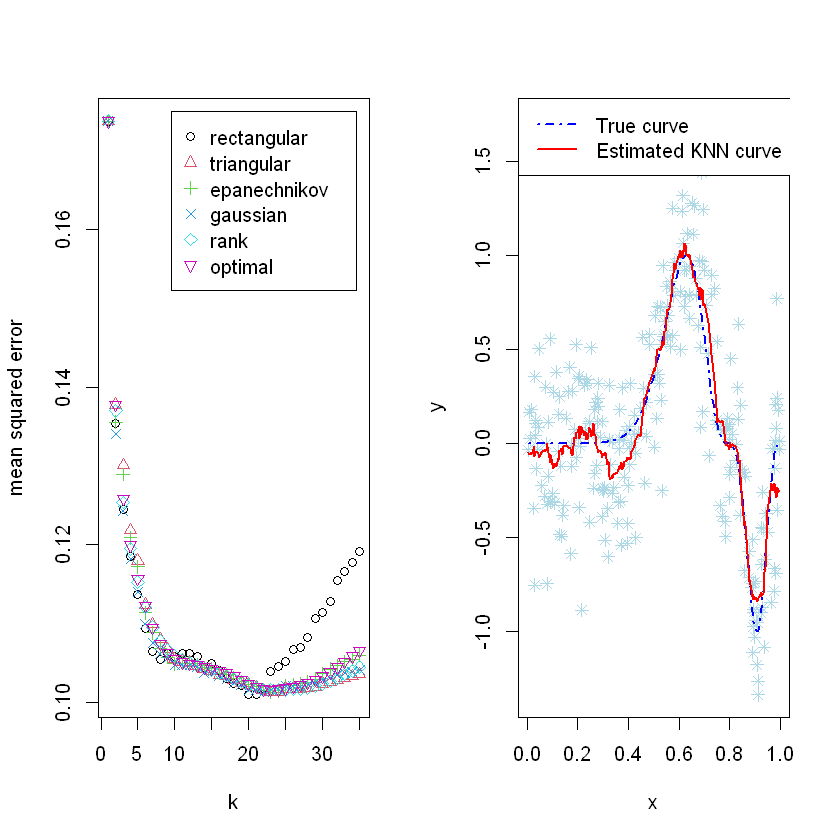

In [8]:
cv.exa = train.kknn(y~x,data=exa,kmax=35,kernel=c("rectangular",
         "triangular","epanechnikov","gaussian","rank","optimal"))
par(mfrow = c(1, 2))
plot(cv.exa)
cv.exa$best.parameters
plot(y ~ x,  data = exa, pch = 8, col = "lightblue")
lines(m ~ x, data = exa, lwd = 2, col = "blue", lty = 4)
lines(x, cv.exa$fitted.values[21][[1]], lwd = 2, col = "red")
legend("topleft", legend=c("True curve", "Estimated KNN curve"),
       col = c("blue", "red"), lty = c(4, 1), lwd = 2)
mean(y-cv.exa$fitted.values[21][[1]])^2

###### 2、多项式回归

对非参数回归函数$g(.)$, 可用$d$阶多项式函数逼近, 即
$$g(x_i)\approx\beta_0+\beta_1 x_i+\beta_2 x_i^2+\cdots+\beta_d x_i^d, i=1,2,\cdots,n$$
其中，$1,x,x^2,\cdots,x^d$成为多项式基函数。这时，非参数回归模型可写为如下的多项式回归模型
$$y_i\approx\beta_0+\beta_1 x_i+\beta_2 x_i^2+\cdots+\beta_d x_i^d+\epsilon_i,i=1,2,\cdots,n$$
因此，可以用最小二乘估计方法得到$\beta_0, \beta_1,\cdots,\beta_d$的估计，进而可得到回归函数$g(x)$的估计为：
$$\hat{g}(x)=\hat{\beta}_0+\hat{\beta}_1 x+\cdots+\hat{\beta}_d x^d$$

对于$d$阶多项式拟合, 自由度为$d+1$, 且多项式阶数$d$的选择也至关重要. 如果$d$太大, 拟合的自由度变大, 模型变得复杂, 将导致过拟合现象, 即偏差小, 而方差大. 如果$d$太小, 拟合的自由度变小, 将导致欠拟合现象, 即偏差大, 而方差小.  理论上, 通过平衡偏差和方差, 获得最优的多项式阶数$d$. 在应用上, 可采用数据驱动的LOOCV、 GCV或$k$折CV等方法进行选取.

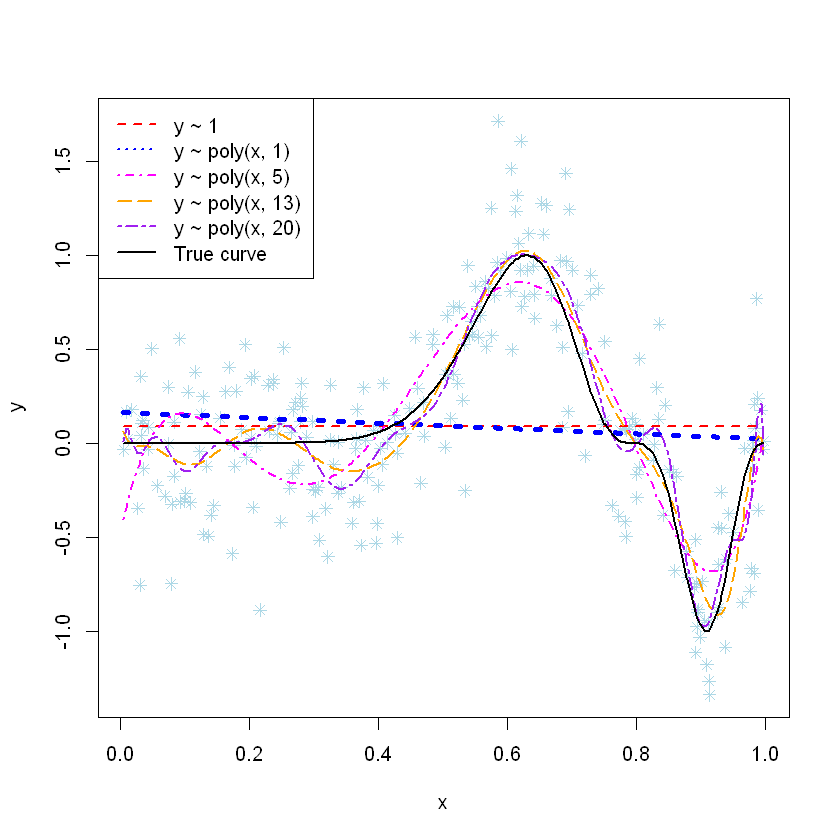

In [10]:
n = length(x); newdata = data.frame(x)
fit1 = lm(y ~ 1)
fit2 = lm(y ~ poly(x, degree = 1))
fit3 = lm(y ~ poly(x, degree = 5))
fit4 = lm(y ~ poly(x, degree = 13))
fit5 = lm(y ~ poly(x, degree = 20))
plot(y ~ x,  pch = 8, col = "lightblue")
lines(x, predict(fit1, newdata), col="red",    lwd=2, lty=2)
lines(x, predict(fit2, newdata), col="blue",   lwd=4, lty=3)
lines(x, predict(fit3, newdata), col="magenta",lwd=2, lty=4)
lines(x, predict(fit4, newdata), col="orange", lwd=2, lty=5)
lines(x, predict(fit5, newdata), col="purple", lwd=2, lty=6)
lines(x, m, col = "black", lwd = 2, lty = 1)
legend("topleft", c("y ~ 1", "y ~ poly(x, 1)", "y ~ poly(x, 5)",
       "y ~ poly(x, 13)", "y ~ poly(x, 20)", "True curve"),
       col=c("red","blue","magenta","orange","purple","black"),
       lty = c(2, 3, 4, 5, 6, 1), lwd = 2)

In [11]:
library(boot)
set.seed(2023)
cv.error = rep(0, 20)
for (i in 1:20){
  glm.fit = glm(y ~ poly(x, i), data = exa)
  cv.error[i] = cv.glm(exa[,1:2], glm.fit, K = 5)$delta[1]
}
cv.error
##  [1] 0.3254797 0.2448106 0.2191660 0.1992482 0.1243432 0.1135600 0.1134740
##  [8] 0.1096948 0.1076100 0.1074226 0.1083222 0.1088593 0.1036305 0.1061909
## [15] 0.1049894 0.1069855 0.1116689 0.1110594 0.1069343 0.1072205
(d.opt = which.min(cv.error))
## [1] 13
preds = predict(fit4, newdata, se = TRUE)
mean(y-preds$fit)^2
## [1] 6.695759e-35

[1] 0.3254797 0.2448106 0.2191660 0.1992482 0.1243432 0.1135600 0.1134740
 [8] 0.1096948 0.1076100 0.1074226 0.1083222 0.1088593 0.1036305 0.1061909
[15] 0.1049894 0.1069855 0.1116689 0.1110594 0.1069343 0.1072205

[1] 13

[1] 3.158059e-33

###### 3. Nadaraya-Watson核估计方法

令$K(.)$是一个核函数, $h$为窗宽, 主要用于控制局部区域的大小.  Nadaraya-Watson核估计方法的主要思想是: 对于变量$x_i$支撑集内任意给定的一点$x$, 在$x$的一个邻域$[x-h,x+h]$中,  假定回归函数$g(.)$为一个常数$\theta$, 如果$h\to0$,  这时在局部邻域$[x-h,x+h]$内, 极小化加权最小二乘目标函数, 则可得到Nadaraya-Watson核估计, 定义为
$$\hat{g}_{NM}(x)=arg\min\limits_{\theta}\sum\limits_{i=1}^n (y_i-\theta)^2 K(\frac{x_i-x}{h}) = \sum\limits_{i=1}^n W_{ni}(x)y_i$$
其中，$$W_{ni}=\frac{K(\frac{x_i-x)}{h})}{\sum\limits_{j=1}^n K(\frac{x_j-x}{h})$$
为核权函数，$i=1,2,\cdots,n$。Nadaraya-Watson核估计$\hat{g}_{NM}(x)$是响应变量$y_i$的加权平均值。

核函数$K(.)$通常取为某个概率密度函数, 常用的核函数有: 高斯核, 定义为$K(u)=\frac{1}{\sqrt{2\pi}}\exp(-u^2/2)$ ; Epanechnikov核, 定义为 $K(u)=\frac{3}{4}(1-u^2)I(|u|\leq 1)$.

在实际应用中, 广泛采用的窗宽选取方法为LOOCV和GCV等数据驱动的方法. 下面用函数ksmooth()对exa数据集进行Nadaraya-Watson核估计, 取三种不同的窗宽.

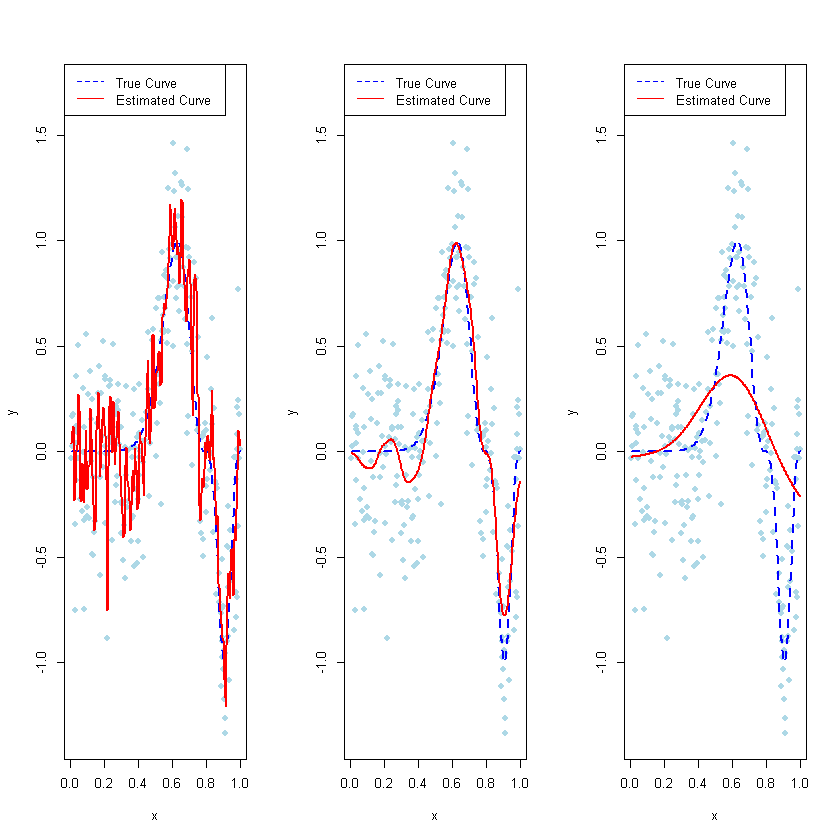

In [17]:
par(mfrow = c(1, 3))
for(bw in c(0.01, 0.08, 0.5)){
with(exa, {
plot(y ~ x, col = "lightblue", pch = 19)
lines(x, m, lwd = 2, lty = 2, col = "blue")
lines(ksmooth(x, y, "normal", bw), lwd = 2, col = "red")
legend("topleft", legend = c("True Curve", "Estimated Curve"),
        col = c("blue", "red"), lty = c(2, 1), lwd = 1)
})}

###### 4. 回归树方法

回归树方法即是利用决策树进行回归，具体理论不再详细介绍。针对exa数据集, 介绍如何利用程序包rpart建立回归树并进行回归分析.

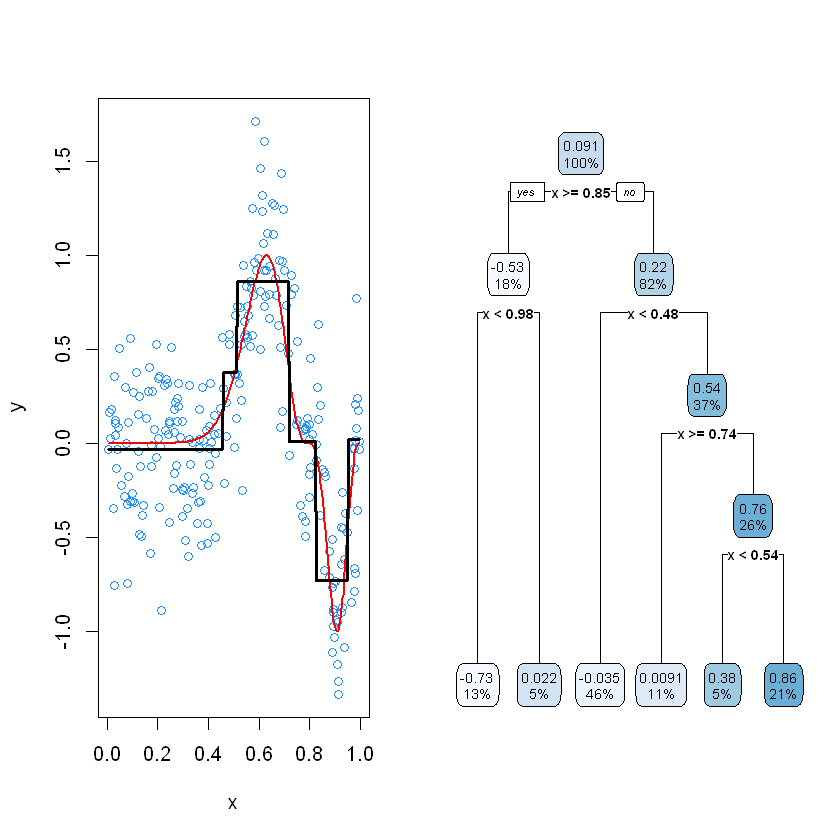

In [27]:
library(rpart); library(rpart.plot); library(tibble)
par(mfrow = c(1, 2))
tree.exa = rpart(y ~ x, data = exa)
plot(y ~ x, data = exa, col = "dodgerblue", main = "")
lines(m ~ x, data = exa, lwd = 2, col = "red")
curve(predict(tree.exa, tibble(x = exa$x)), col = "black",
      lwd = 3, lty = 1, add = TRUE, n = 256)
rpart.plot::rpart.plot(tree.exa)

In [26]:
install.packages('rpart.plot')

Installing package into 'C:/Users/thsm9/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\thsm9\AppData\Local\Temp\Rtmp461chD\downloaded_packages
